

<img src = "https://www.bikeshare.com/wp-content/uploads/2018/02/Screen-Shot-2018-02-15-at-11.32.22-AM-min.png" align = "center">


<h1 align=center><font size = 5> Toronto Bikeshare 2017</font></h1>




# Import Dataset and Library

Import the Library 

In [2]:
from google.colab import files
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import seaborn as sns

Import the data set and analyze it.

In [ ]:
q1 = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Bikeshare 2017/Bikeshare Ridership (2017 Q1).csv')
q2 = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Bikeshare 2017/Bikeshare Ridership (2017 Q2).csv')
q3 = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Bikeshare 2017/Bikeshare Ridership (2017 Q3).csv')
q4 = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Bikeshare 2017/Bikeshare Ridership (2017 Q4).csv')

In [ ]:
display(q1.head())
display(q2.head())
display(q3.head())
display(q4.head())

,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,1/1/2017 0:00,1/1/2017 0:03,223,7051,Wellesley St E / Yonge St Green P,7089,Church St / Wood St,Member
1,712383,1/1/2017 0:00,1/1/2017 0:05,279,7143,Kendal Ave / Bernard Ave,7154,Bathurst Subway Station,Member
2,712384,1/1/2017 0:05,1/1/2017 0:29,1394,7113,Parliament St / Aberdeen Ave,7199,College St W / Markham St,Member
3,712385,1/1/2017 0:07,1/1/2017 0:21,826,7077,College Park South,7010,King St W / Spadina Ave,Member
4,712386,1/1/2017 0:08,1/1/2017 0:12,279,7079,McGill St / Church St,7047,University Ave / Gerrard St W,Member


,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,868665,1/4/2017 0:01,1/4/2017 0:06,297.0,7073.0,Bremner Blvd / Spadina Ave,7211.0,Fort York Blvd / Garrison Rd,Member
1,868666,1/4/2017 0:07,1/4/2017 0:11,236.0,7038.0,Dundas St / Yonge St,7163.0,Yonge St / Wood St,Member
2,868667,1/4/2017 0:08,1/4/2017 0:14,380.0,7012.0,Elizabeth St / Edward St (Bus Terminal),7069.0,Queen St W / Spadina Ave,Member
3,868668,1/4/2017 0:12,1/4/2017 0:34,1299.0,7172.0,Strachan Ave / Princes' Blvd,7069.0,Queen St W / Spadina Ave,Member
4,868669,1/4/2017 0:13,1/4/2017 0:18,323.0,7039.0,Simcoe St / Dundas St W,7021.0,Bay St / Albert St,Member


,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,1253914,7/1/2017 0:00,7/1/2017 0:15,910,Princess St / Adelaide St E,424 Wellington St W,Member
1,1253915,7/1/2017 0:01,7/1/2017 0:15,837,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
2,1253916,7/1/2017 0:01,7/1/2017 0:14,786,Fort York Blvd / Capreol Crt,HTO Park (Queens Quay W),Casual
3,1253917,7/1/2017 0:01,7/1/2017 0:25,1420,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual
4,1253918,7/1/2017 0:01,7/1/2017 0:25,1437,Elizabeth St / Edward St (Bus Terminal),Boston Ave / Queen St E,Casual


,trip_id,trip_start_time,trip_stop_time,trip_duration_seconds,from_station_name,to_station_name,user_type
0,1971685,10/01/17 00:00:01,10/01/17 00:14:10,849,Queen St W / James St,Taddle Creek Park,Member
1,1971686,10/01/17 00:00:01,10/01/17 00:00:27,26,Stewart St / Bathurst St - SMART,Stewart St / Bathurst St - SMART,Casual
2,1971687,10/01/17 00:00:22,10/01/17 00:22:12,1310,Hayter St / Laplante Ave,Queen St W / Portland St,Member
3,1971688,10/01/17 00:00:38,10/01/17 00:11:09,631,Beverly St / College St,Beverly St / Dundas St W,Member
4,1971689,10/01/17 00:00:55,10/01/17 00:20:53,1198,Thompson St / Broadview Ave - SMART,Thompson St / Broadview Ave - SMART,Member


# Exploratory Data Analysis

the columns of each data were different, so we have to check the shape of each data set. 

In [ ]:
print(q1.shape)
print(q2.shape)
print(q3.shape)
print(q4.shape)

(132123, 9)
(196152, 9)
(663488, 7)
(363405, 7)


As you can see, q1 and q2 data set have the same number of columns. so was q3 and q4 data set. but q1,q2 and q3,q4 have different number of columns. so we will concatenate q1 and q2. then we will concatenate q3 and q4 also.

In [ ]:
bikeshare2017_1 = pd.concat([q1,q2],join='outer')
bikeshare2017_2 = pd.concat([q3,q4],join='outer')


Check if there are missing values in the data and remove it.

In [ ]:
bikeshare2017_1.isnull().sum()

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    1
from_station_id          1
from_station_name        1
to_station_id            1
to_station_name          1
user_type                1
dtype: int64

In [ ]:
bikeshare2017_1.dropna(axis=0,how='any',inplace=True)

In [ ]:
bikeshare2017_1.isnull().sum()

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_id          0
from_station_name        0
to_station_id            0
to_station_name          0
user_type                0
dtype: int64

In [ ]:
bikeshare2017_2.isnull().sum()

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_name        0
to_station_name          1
user_type                0
dtype: int64

In [ ]:
bikeshare2017_2.dropna(axis=0,how='any',inplace=True)
bikeshare2017_2.isnull().sum()

trip_id                  0
trip_start_time          0
trip_stop_time           0
trip_duration_seconds    0
from_station_name        0
to_station_name          0
user_type                0
dtype: int64




# Question No.1  : Find out what percentage of bikes are returned to its initial location ?



we will find if the bikes were returned to it's initial location using from_station_id, to_station_id, from_station_name and to_station_name feature in each data set. if each feature is common, so the bikes were returned to it's initial location.

In [ ]:
bike_returned_2017_1 = bikeshare2017_1.loc[bikeshare2017_1['from_station_id']==bikeshare2017_1['to_station_id']]
bike_returned_2017_2 = bikeshare2017_2.loc[bikeshare2017_2['from_station_name']==bikeshare2017_2['to_station_name']]
df1 = bike_returned_2017_1
df2 = bike_returned_2017_2
print(df1.shape)
print(df2.shape)

(7316, 9)
(59900, 7)


In [ ]:
bikeshare_oneway = bike_returned_2017_1.shape[0] + bike_returned_2017_2.shape[0]
bikeshare_oneway

67216

As you can see, we have 62998 bikehsshare trip that returned to it's initial location or do a oneway trip. Further, we will analyze how much bikeshare trip do a twoway trip or not returned to it's initial location

In [ ]:
bike_notreturned_2017_1 = bikeshare2017_1.loc[bikeshare2017_1['from_station_id']!=bikeshare2017_1['to_station_id']]
bike_notreturned_2017_2 = bikeshare2017_2.loc[bikeshare2017_2['from_station_name']!=bikeshare2017_2['to_station_name']]

In [ ]:
bikeshare_twoway = bike_notreturned_2017_1.shape[0] + bike_notreturned_2017_2.shape[0]
bikeshare_twoway

1287950

Now, we create dataframe which contains the bikeshare onway and bikeshare twoway data

In [ ]:
bikeshare_2017 = {'Total Bikeshare Oneway': bikeshare_oneway, 'Total Bikeshare Twoway': bikeshare_twoway}
df3 = pd.DataFrame(data=bikeshare_2017,index=['Bikeshare 2017'])
df3

,Total Bikeshare Oneway,Total Bikeshare Twoway
Bikeshare 2017,67216,1287950


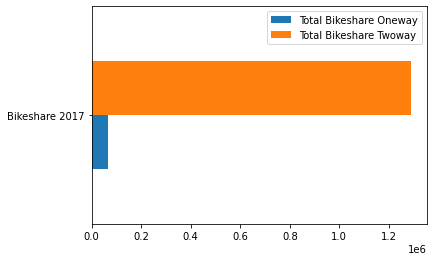

In [ ]:
df3.plot(kind='barh')

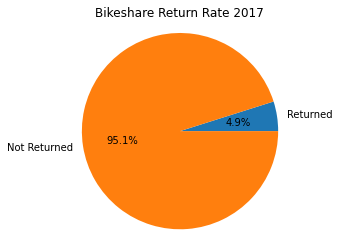

In [ ]:
labels = ['Returned','Not Returned']
sizes = [bike_returned_2017,bike_notreturned_2017]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Bikeshare Return Rate 2017')


plt.show()




#Qestion No. 2 : How many bikeshare trips usually visit more than just start/end points, but visited some other points before the end of the day?



Now we can assume if each trip id use more time than the average trip duration then the trip visited more than one point, so we need to find every single bikeshare trip which have trip duration greater than average trip duration in each day

In [3]:
q1 = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Bikeshare 2017/Bikeshare Ridership (2017 Q1).csv')
q2 = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Bikeshare 2017/Bikeshare Ridership (2017 Q2).csv')
q3 = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Bikeshare 2017/Bikeshare Ridership (2017 Q3).csv')
q4 = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/Bikeshare 2017/Bikeshare Ridership (2017 Q4).csv')

Because we want to find How many bikeshare trips usually
visited some other points, we need to convert the time feature in pandas data frame. below we will convert trip_start_time column into pandas datetime type so we can clasify the row into day value like monday, tuesday, wednesday and so on.

In [4]:
q1['trip_start_time']=pd.to_datetime(q1['trip_start_time'])
q2['trip_start_time']=pd.to_datetime(q2['trip_start_time'])
q3['trip_start_time']=pd.to_datetime(q3['trip_start_time'])
q4['trip_start_time']=pd.to_datetime(q4['trip_start_time'])

In [5]:
bikeshare2017 = pd.concat([q1,q2,q3,q4])
bikeshare2017.drop(columns={'trip_stop_time'},inplace=True)
bikeshare2017

,trip_id,trip_start_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
0,712382,2017-01-01 00:00:00,223.0,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
1,712383,2017-01-01 00:00:00,279.0,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
2,712384,2017-01-01 00:05:00,1394.0,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member
3,712385,2017-01-01 00:07:00,826.0,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member
4,712386,2017-01-01 00:08:00,279.0,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member
...,...,...,...,...,...,...,...,...
363400,2383642,2017-12-31 23:46:27,26.0,NaN,Bloor St / Brunswick Ave,NaN,Bloor St / Brunswick Ave,Casual
363401,2383643,2017-12-31 23:47:13,1467.0,NaN,Bloor St / Brunswick Ave,NaN,HTO Park (Queens Quay W),Casual
363402,2383644,2017-12-31 23:47:40,609.0,NaN,Kendal Ave / Spadina Rd,NaN,Augusta Ave / Denison Sq,Member
363403,2383645,2017-12-31 23:49:08,26.0,NaN,Phoebe St / Spadina Ave,NaN,Phoebe St / Spadina Ave,Member


In [6]:
bikeshare2017['weekday_start'] = bikeshare2017['trip_start_time'].apply(lambda time: time.dayofweek)

In [7]:
day = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bikeshare2017['weekday_start'] = bikeshare2017['weekday_start'].map(day)
bikeshare2017

,trip_id,trip_start_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type,weekday_start
0,712382,2017-01-01 00:00:00,223.0,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member,Sun
1,712383,2017-01-01 00:00:00,279.0,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member,Sun
2,712384,2017-01-01 00:05:00,1394.0,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member,Sun
3,712385,2017-01-01 00:07:00,826.0,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member,Sun
4,712386,2017-01-01 00:08:00,279.0,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member,Sun
...,...,...,...,...,...,...,...,...,...
363400,2383642,2017-12-31 23:46:27,26.0,NaN,Bloor St / Brunswick Ave,NaN,Bloor St / Brunswick Ave,Casual,Sun
363401,2383643,2017-12-31 23:47:13,1467.0,NaN,Bloor St / Brunswick Ave,NaN,HTO Park (Queens Quay W),Casual,Sun
363402,2383644,2017-12-31 23:47:40,609.0,NaN,Kendal Ave / Spadina Rd,NaN,Augusta Ave / Denison Sq,Member,Sun
363403,2383645,2017-12-31 23:49:08,26.0,NaN,Phoebe St / Spadina Ave,NaN,Phoebe St / Spadina Ave,Member,Sun


Now we have the feature of day in the dataset. since we want to analyze how much bikeshare trip visited more than one point in a day using comparison between trip duration second each trip, so we could drop every column than unusefull for this. we just need column weekday_start and trip_duration_seconds

---



In [8]:
bikeshare2017[['weekday_start','trip_duration_seconds']]
bikeshare2017.set_index(keys='weekday_start',drop=True,inplace=True)
bikeshare2017

,trip_id,trip_start_time,trip_duration_seconds,from_station_id,from_station_name,to_station_id,to_station_name,user_type
weekday_start,,,,,,,,
Sun,712382,2017-01-01 00:00:00,223.0,7051.0,Wellesley St E / Yonge St Green P,7089.0,Church St / Wood St,Member
Sun,712383,2017-01-01 00:00:00,279.0,7143.0,Kendal Ave / Bernard Ave,7154.0,Bathurst Subway Station,Member
Sun,712384,2017-01-01 00:05:00,1394.0,7113.0,Parliament St / Aberdeen Ave,7199.0,College St W / Markham St,Member
Sun,712385,2017-01-01 00:07:00,826.0,7077.0,College Park South,7010.0,King St W / Spadina Ave,Member
Sun,712386,2017-01-01 00:08:00,279.0,7079.0,McGill St / Church St,7047.0,University Ave / Gerrard St W,Member
...,...,...,...,...,...,...,...,...
Sun,2383642,2017-12-31 23:46:27,26.0,NaN,Bloor St / Brunswick Ave,NaN,Bloor St / Brunswick Ave,Casual
Sun,2383643,2017-12-31 23:47:13,1467.0,NaN,Bloor St / Brunswick Ave,NaN,HTO Park (Queens Quay W),Casual
Sun,2383644,2017-12-31 23:47:40,609.0,NaN,Kendal Ave / Spadina Rd,NaN,Augusta Ave / Denison Sq,Member


Now we have tremendous and big data set in this notebook, we will separate them into 7 dataframe which represent each day in weeks. each data frame has information such day and trip duration in second.

In [9]:
sun = bikeshare2017['trip_duration_seconds']['Sun']
mon = bikeshare2017['trip_duration_seconds']['Mon']
tue = bikeshare2017['trip_duration_seconds']['Tue']
wed = bikeshare2017['trip_duration_seconds']['Wed']
thu = bikeshare2017['trip_duration_seconds']['Thu']
fri = bikeshare2017['trip_duration_seconds']['Fri']
sat = bikeshare2017['trip_duration_seconds']['Sat']

In [10]:
data_sun = pd.DataFrame(data=sun)
data_mon = pd.DataFrame(data=mon)
data_tue = pd.DataFrame(data=tue)
data_wed = pd.DataFrame(data=wed)
data_thu = pd.DataFrame(data=thu)
data_fri = pd.DataFrame(data=fri)
data_sat = pd.DataFrame(data=sat)

now we will do a simple selection. we will select data include trip duration in second which larger than the average/mean trip duration in every different day.
First we will do selection for sunday

In [12]:
print(data_sun['trip_duration_seconds'].mean())
visit_more_point_sun = data_sun.loc[data_sun['trip_duration_seconds']>=data_sun['trip_duration_seconds'].mean()]
display(visit_more_point_sun)

1392.7523282278403


,trip_duration_seconds
weekday_start,
Sun,1394.0
Sun,1702.0
Sun,1801.0
Sun,1793.0
Sun,1403.0
...,...
Sun,2243.0
Sun,1555.0
Sun,1531.0


second, we will do selection for tuesday. and so on till monday

In [13]:
print(data_mon['trip_duration_seconds'].mean())
visit_more_point_mon = data_mon.loc[data_mon['trip_duration_seconds']>=data_mon['trip_duration_seconds'].mean()]
display(visit_more_point_mon)

990.532267403472


,trip_duration_seconds
weekday_start,
Mon,1392.0
Mon,1191.0
Mon,1170.0
Mon,1096.0
Mon,1134.0
...,...
Mon,6971.0
Mon,1140.0
Mon,1177.0


In [14]:
print(data_tue['trip_duration_seconds'].mean())
visit_more_point_tue = data_tue.loc[data_tue['trip_duration_seconds']>=data_tue['trip_duration_seconds'].mean()]
display(visit_more_point_tue)

885.8438352512129


,trip_duration_seconds
weekday_start,
Tue,937.0
Tue,969.0
Tue,1069.0
Tue,1024.0
Tue,6755.0
...,...
Tue,1522.0
Tue,1428.0
Tue,1088.0


In [15]:
print(data_wed['trip_duration_seconds'].mean())
visit_more_point_wed = data_wed.loc[data_wed['trip_duration_seconds']>=data_wed['trip_duration_seconds'].mean()]
display(visit_more_point_wed)

883.683700221489


,trip_duration_seconds
weekday_start,
Wed,989.0
Wed,1214.0
Wed,1473.0
Wed,1453.0
Wed,1344.0
...,...
Wed,1125.0
Wed,1125.0
Wed,1106.0


In [16]:
print(data_thu['trip_duration_seconds'].mean())
visit_more_point_thu = data_thu.loc[data_thu['trip_duration_seconds']>=data_thu['trip_duration_seconds'].mean()]
display(visit_more_point_thu)

876.53597021109


,trip_duration_seconds
weekday_start,
Thu,953.0
Thu,879.0
Thu,947.0
Thu,888.0
Thu,991.0
...,...
Thu,964.0
Thu,1128.0
Thu,1725.0


In [17]:
print(data_fri['trip_duration_seconds'].mean())
visit_more_point_fri = data_fri.loc[data_fri['trip_duration_seconds']>=data_fri['trip_duration_seconds'].mean()]
display(visit_more_point_fri)

909.9927030873106


,trip_duration_seconds
weekday_start,
Fri,1046.0
Fri,1265.0
Fri,998.0
Fri,4252.0
Fri,1826.0
...,...
Fri,1043.0
Fri,1084.0
Fri,2052.0


In [18]:
print(data_sat['trip_duration_seconds'].mean())
visit_more_point_sat = data_sat.loc[data_sat['trip_duration_seconds']>=data_sat['trip_duration_seconds'].mean()]
display(visit_more_point_sat)

1334.6012941762071


,trip_duration_seconds
weekday_start,
Sat,1376.0
Sat,1721.0
Sat,1560.0
Sat,1409.0
Sat,1353.0
...,...
Sat,1910.0
Sat,1338.0
Sat,1354.0


In [19]:
visit_more_point_all = pd.concat([visit_more_point_mon,visit_more_point_tue,visit_more_point_wed,visit_more_point_thu,
                                  visit_more_point_fri,visit_more_point_fri,visit_more_point_sat,visit_more_point_sun])
display(visit_more_point_all)
print(visit_more_point_all.shape)

,trip_duration_seconds
weekday_start,
Mon,1392.0
Mon,1191.0
Mon,1170.0
Mon,1096.0
Mon,1134.0
...,...
Sun,2243.0
Sun,1555.0
Sun,1531.0


(407917, 1)


Last, we will make data frame contains days in a week and bikeshare whch visitted some other point. 

In [34]:
visit_more_point_day = {'Bikeshare visit some other point':(visit_more_point_mon.shape[0],visit_more_point_tue.shape[0],visit_more_point_wed.shape[0],visit_more_point_thu.shape[0]
                                                                , visit_more_point_fri.shape[0],visit_more_point_sat.shape[0],visit_more_point_sun.shape[0])}

In [21]:
index = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

In [22]:
df = pd.DataFrame(data=visit_more_point_day,index=index)
df

,Bikeshare visit some other point
Monday,49696
Tuesday,59646
Wednesday,66592
Thursday,54741
Friday,54522
Saturday,36135
Sunday,32063


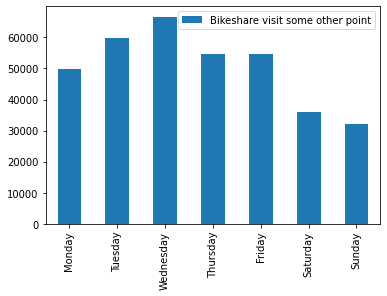

In [23]:
df.plot(kind='bar')

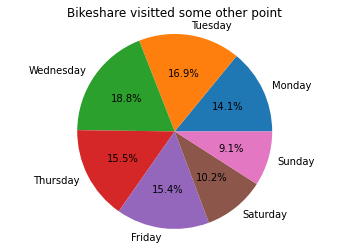

In [24]:
labels = index
sizes = visit_more_point_mon.shape[0],visit_more_point_tue.shape[0],visit_more_point_wed.shape[0],visit_more_point_thu.shape[0],visit_more_point_fri.shape[0],visit_more_point_sat.shape[0],visit_more_point_sun.shape[0]
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
ax.set_title('Bikeshare visitted some other point')


plt.show()

Now, we would make comparison between bikeshare visit more point and bikeshare visit one point. 

In [25]:
print(data_sun['trip_duration_seconds'].mean())
visit_one_point_sun = data_sun.loc[data_sun['trip_duration_seconds']<=data_sun['trip_duration_seconds'].mean()]
display(visit_one_point_sun)

1392.7523282278403


,trip_duration_seconds
weekday_start,
Sun,223.0
Sun,279.0
Sun,826.0
Sun,279.0
Sun,571.0
...,...
Sun,978.0
Sun,26.0
Sun,609.0


In [26]:
print(data_mon['trip_duration_seconds'].mean())
visit_one_point_mon = data_mon.loc[data_mon['trip_duration_seconds']<=data_mon['trip_duration_seconds'].mean()]
display(visit_one_point_mon)

990.532267403472


,trip_duration_seconds
weekday_start,
Mon,865.0
Mon,273.0
Mon,230.0
Mon,361.0
Mon,755.0
...,...
Mon,368.0
Mon,673.0
Mon,352.0


In [28]:
print(data_tue['trip_duration_seconds'].mean())
visit_one_point_tue = data_tue.loc[data_tue['trip_duration_seconds']<=data_tue['trip_duration_seconds'].mean()]
display(visit_one_point_tue)

885.8438352512129


,trip_duration_seconds
weekday_start,
Tue,247.0
Tue,588.0
Tue,767.0
Tue,590.0
Tue,161.0
...,...
Tue,295.0
Tue,371.0
Tue,527.0


In [29]:
print(data_wed['trip_duration_seconds'].mean())
visit_one_point_wed = data_wed.loc[data_wed['trip_duration_seconds']<=data_wed['trip_duration_seconds'].mean()]
display(visit_one_point_wed)

883.683700221489


,trip_duration_seconds
weekday_start,
Wed,804.0
Wed,110.0
Wed,422.0
Wed,288.0
Wed,299.0
...,...
Wed,546.0
Wed,456.0
Wed,348.0


In [30]:
print(data_thu['trip_duration_seconds'].mean())
visit_one_point_thu = data_thu.loc[data_thu['trip_duration_seconds']<=data_thu['trip_duration_seconds'].mean()]
display(visit_one_point_thu)

876.53597021109


,trip_duration_seconds
weekday_start,
Thu,559.0
Thu,290.0
Thu,549.0
Thu,756.0
Thu,684.0
...,...
Thu,234.0
Thu,430.0
Thu,430.0


In [31]:
print(data_fri['trip_duration_seconds'].mean())
visit_one_point_fri = data_fri.loc[data_fri['trip_duration_seconds']<=data_fri['trip_duration_seconds'].mean()]
display(visit_one_point_fri)

909.9927030873106


,trip_duration_seconds
weekday_start,
Fri,390.0
Fri,159.0
Fri,438.0
Fri,116.0
Fri,284.0
...,...
Fri,455.0
Fri,328.0
Fri,317.0


In [32]:
print(data_sat['trip_duration_seconds'].mean())
visit_one_point_sat = data_sat.loc[data_sat['trip_duration_seconds']<=data_sat['trip_duration_seconds'].mean()]
display(visit_one_point_sat)

1334.6012941762071


,trip_duration_seconds
weekday_start,
Sat,213.0
Sat,389.0
Sat,320.0
Sat,508.0
Sat,915.0
...,...
Sat,30.0
Sat,193.0
Sat,480.0


In [33]:
visit_one_point_day = {'Bikeshare visit one point':(visit_one_point_mon.shape[0],visit_one_point_tue.shape[0],visit_one_point_wed.shape[0],visit_one_point_thu.shape[0]
                                                                , visit_one_point_fri.shape[0],visit_one_point_sat.shape[0],visit_one_point_sun.shape[0])}
df1 = pd.DataFrame(data=visit_one_point_day,index=index)
df1                

,Bikeshare visit one point
Monday,147190
Tuesday,150395
Wednesday,154638
Thursday,140768
Friday,143644
Saturday,134630
Sunday,130507


In [36]:
df2 = pd.merge(df,df1,left_index=True,right_index=True)
df2

,Bikeshare visit some other point,Bikeshare visit one point
Monday,49696,147190
Tuesday,59646,150395
Wednesday,66592,154638
Thursday,54741,140768
Friday,54522,143644
Saturday,36135,134630
Sunday,32063,130507


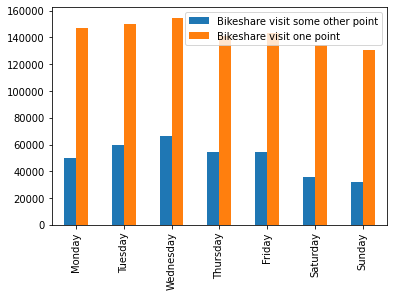

In [43]:
df2.plot(kind='bar')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fd0c63e6630>,
      dtype=object)

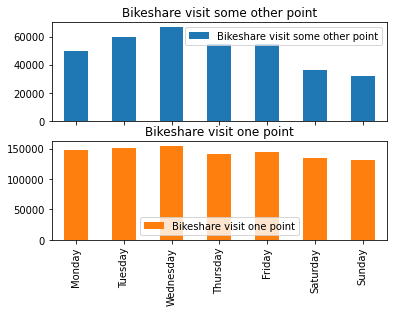

In [73]:
df2.plot(kind='bar',subplots=True)